In [1]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup

In [2]:
raw = pd.read_excel('data/working data/country_score.xlsx')

In [3]:
raw.head(2)

,Country Code ISO3,Country,year,population,SDG Index Score,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,...,n_sdg16_weaponsexp,n_sdg16_rsf,n_sdg16_justice,n_sdg16_admin,n_sdg16_exprop,n_sdg17_govex,n_sdg17_oda,n_sdg17_govrev,n_sdg17_cohaven,n_sdg17_statperf
0,AFG,Afghanistan,2000,19669913.0,36.011178,28.836,27.317429,19.249714,1.633,20.83,...,100.0,47.167,42.308,12.143,8.8,20.667,NaN,0.0,100.0,16.297
1,AFG,Afghanistan,2001,19416052.0,36.309069,28.836,30.564571,19.380714,1.633,20.83,...,100.0,47.167,42.308,12.143,8.8,20.667,NaN,0.0,100.0,16.297


In [4]:
raw.dropna(subset='population', inplace = True)

In [5]:
raw['SDG Index Score'].info()

<class 'pandas.core.series.Series'>
Index: 3818 entries, 0 to 4139
Series name: SDG Index Score
Non-Null Count  Dtype  
--------------  -----  
3818 non-null   float64
dtypes: float64(1)
memory usage: 59.7 KB


In [6]:
raw.iloc[:,0:22]

,Country Code ISO3,Country,year,population,SDG Index Score,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,...,Goal 8 Score,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score
0,AFG,Afghanistan,2000,19669913.0,36.011178,28.8360,27.317429,19.249714,1.63300,20.83000,...,38.481286,5.183429,NaN,25.79900,94.708571,99.401667,NaN,51.8860,39.223818,34.24100
1,AFG,Afghanistan,2001,19416052.0,36.309069,28.8360,30.564571,19.380714,1.63300,20.83000,...,38.489143,5.183429,NaN,25.79900,94.510571,99.398333,NaN,51.8860,39.223818,34.24100
2,AFG,Afghanistan,2002,19961213.0,36.289025,28.8360,30.703143,19.655857,1.63300,20.83000,...,38.409429,5.183429,NaN,26.14150,94.101571,99.378333,NaN,51.8360,39.223818,34.24100
3,AFG,Afghanistan,2003,22039300.0,36.690066,28.8360,32.460857,19.865643,1.63300,20.83000,...,38.443000,5.195286,NaN,26.48425,94.383571,99.371667,NaN,51.8360,39.223818,34.24100
4,AFG,Afghanistan,2004,23250960.0,37.054653,28.8360,32.092286,21.113643,1.63300,20.83000,...,38.481857,5.195286,NaN,26.82675,94.834143,99.401667,NaN,51.8360,39.223818,34.24100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,ZWE,Zimbabwe,2018,14900379.0,55.925966,26.4120,46.638500,39.768000,57.94600,76.68625,...,63.760714,23.543333,32.4315,79.20950,94.573429,94.124333,NaN,76.4460,45.481545,45.59650
4136,ZWE,Zimbabwe,2019,15203989.0,53.729608,21.3910,46.039667,40.615929,60.56575,76.96025,...,62.807857,23.783500,23.9810,58.58425,94.573429,94.226000,NaN,76.3960,43.965000,44.52725
4137,ZWE,Zimbabwe,2020,15505226.0,54.299088,20.0690,47.221667,41.547143,62.04550,76.96025,...,62.900429,25.444833,23.9810,59.97250,94.573429,94.304333,NaN,76.3960,44.631727,46.03475
4138,ZWE,Zimbabwe,2021,15834106.0,54.782128,20.8335,48.358167,41.907714,62.49700,77.07050,...,63.134429,26.964000,23.9810,61.19000,94.504286,94.256000,NaN,77.9426,43.084000,48.08800


In [7]:
global_score = raw.loc[:,['Country Code ISO3', 'Country', 'year', 'population', 'SDG Index Score']]

In [8]:
global_score.head(1)

,Country Code ISO3,Country,year,population,SDG Index Score
0,AFG,Afghanistan,2000,19669913.0,36.011178


In [9]:
#global_score.to_excel('country_gobal_score.xlsx', index=False)

In [10]:
goals_score = raw.iloc[:,0:22]
goals_score.drop(columns = 'SDG Index Score', inplace = True)

In [11]:
goals_score.head(1)

,Country Code ISO3,Country,year,population,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,Goal 6 Score,...,Goal 8 Score,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score
0,AFG,Afghanistan,2000,19669913.0,28.836,27.317429,19.249714,1.633,20.83,32.388,...,38.481286,5.183429,NaN,25.799,94.708571,99.401667,NaN,51.886,39.223818,34.241


In [12]:
#goals_score.to_excel('goals_score.xlsx', index=False)

In [13]:
goal_1 = raw.drop(columns = raw.columns[4:22])
goal_1.drop(columns = goal_1.columns[6:], inplace = True)

In [14]:
#goal_1.to_csv('goal_1.csv', index=False)

In [15]:
goal_2 = raw.drop(columns = raw.columns[4:24])
goal_2.drop(columns = goal_2.columns[12:], inplace = True)

In [16]:
#goal_2.to_csv('goal_2.csv', index=False)

In [17]:
goal_3 = raw.drop(columns = raw.columns[4:32])
goal_3.drop(columns = goal_3.columns[18:], inplace = True)

In [18]:
#goal_3.to_csv('goal_3.csv', index=False)

In [19]:
goal_4 = raw.drop(columns = raw.columns[4:46])
goal_4.drop(columns = goal_4.columns[8:], inplace = True)

In [20]:
#goal_4.to_csv('goal_4.csv', index=False)

In [21]:
goal_5 = raw.drop(columns = raw.columns[4:50])
goal_5.drop(columns = goal_5.columns[8:], inplace = True)

In [22]:
#goal_5.to_csv('goal_5.csv', index=False)

In [23]:
goal_6 = raw.drop(columns = raw.columns[4:54])
goal_6.drop(columns = goal_6.columns[9:], inplace = True)

In [24]:
#goal_6.to_csv('goal_6.csv', index=False)

In [25]:
goal_7 = raw.drop(columns = raw.columns[4:59])
goal_7.drop(columns = goal_7.columns[8:], inplace = True)

In [26]:
#goal_7.to_csv('goal_7.csv', index=False)

In [27]:
goal_8 = raw.drop(columns = raw.columns[4:63])
goal_8.drop(columns = goal_8.columns[11:], inplace = True)

In [28]:
#goal_8.to_csv('goal_8.csv', index=False)

In [29]:
goal_9 = raw.drop(columns = raw.columns[4:70])
goal_9.drop(columns = goal_9.columns[11:], inplace = True)

In [30]:
#goal_9.to_csv('goal_9.csv', index=False)

In [31]:
goal_10 = raw.drop(columns = raw.columns[4:77])
goal_10.drop(columns = goal_10.columns[6:], inplace = True)

In [32]:
#goal_10.to_csv('goal_10.csv', index=False)

In [33]:
goal_11 = raw.drop(columns = raw.columns[4:79])
goal_11.drop(columns = goal_11.columns[8:], inplace = True)

In [34]:
#goal_11.to_csv('goal_11.csv', index=False)

In [35]:
goal_12 = raw.drop(columns = raw.columns[4:83])
goal_12.drop(columns = goal_12.columns[11:], inplace = True)

In [36]:
#goal_12.to_csv('goal_12.csv', index=False)

In [37]:
goal_13 = raw.drop(columns = raw.columns[4:90])
goal_13.drop(columns = goal_13.columns[7:], inplace = True)

In [38]:
#goal_13.to_csv('goal_13.csv', index=False)

In [39]:
goal_14 = raw.drop(columns = raw.columns[4:93])
goal_14.drop(columns = goal_14.columns[10:], inplace = True)

In [40]:
#goal_14.to_csv('goal_14.csv', index=False)

In [41]:
goal_15 = raw.drop(columns = raw.columns[4:99])
goal_15.drop(columns = goal_15.columns[9:], inplace = True)

In [42]:
#goal_15.to_csv('goal_15.csv', index=False)

In [43]:
goal_16 = raw.drop(columns = raw.columns[4:104])
goal_16.drop(columns = goal_16.columns[15:], inplace = True)

In [44]:
#goal_16.to_csv('goal_16.csv', index=False)

In [45]:
goal_17 = raw.drop(columns = raw.columns[4:115])

In [46]:
#goal_17.to_csv('goal_17.csv', index=False)

In [47]:
#country codes
url = 'https://cloford.com/resources/codes/index.htm'
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find_all('table', class_='outlinetable') 

In [48]:
table_data = []
for row in table[0].find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]  # Extract text from each cell
    table_data.append(row_data)

In [49]:
country_codes = pd.DataFrame(table_data[1:], columns = table_data[0])

In [50]:
country_codes = country_codes.iloc[:,0:7]

In [51]:
country_codes

,Continent,Region,Country,Capital,FIPS,ISO (2),ISO (3)
0,Asia,South Asia,Afghanistan,Kabul,AF,AF,AFG
1,Europe,South East Europe,Albania,Tirana,AL,AL,ALB
2,Africa,Northern Africa,Algeria,Algiers,AG,DZ,DZA
3,Oceania,Pacific,American Samoa,Pago Pago,AQ,AS,ASM
4,Europe,South West Europe,Andorra,Andorra la Vella,AN,AD,AND
...,...,...,...,...,...,...,...
227,Oceania,Pacific,Western Samoa,Apia,WS,WS,WSM
228,Asia,South West Asia,Yemen,Sanaa,YM,YE,YEM
229,Africa,Central Africa,Zaire (Dem Rep of Congo),Kinshasa,CG,ZR,ZAR
230,Africa,Southern Africa,Zambia,Lusaka,ZA,ZM,ZWB


In [52]:
country_codes.drop(columns=['Capital', 'FIPS', 'ISO (2)'], inplace = True)

In [53]:
country_names = pd.DataFrame(raw['Country'])
country_names['ISO (3)'] = raw['Country Code ISO3']
country_names.drop_duplicates(inplace=True)

In [54]:
country_codes.replace({'SDN':'SSD','ROM':'ROU'}, inplace = True)

In [55]:
countries = pd.merge(country_names, country_codes, how= 'left', on='ISO (3)')
countries[countries['Continent'].isna()]

,Country_x,ISO (3),Continent,Region,Country_y
36,"Congo, Dem. Rep.",COD,NaN,NaN,NaN
102,Montenegro,MNE,NaN,NaN,NaN
131,Serbia,SRB,NaN,NaN,NaN
141,Sudan,SDN,NaN,NaN,NaN
164,Zambia,ZMB,NaN,NaN,NaN


In [56]:
countries.loc[36,'Continent'] = 'Africa'
countries.loc[102,'Continent'] = 'Europe'
countries.loc[131,'Continent'] = 'Europe'
countries.loc[141,'Continent'] = 'Africa'
countries.loc[164,'Continent'] = 'Africa'
countries.loc[36,'Region'] = 'Central Africa'
countries.loc[102,'Region'] = 'South East Europe'
countries.loc[131,'Region'] = 'South East Europe'
countries.loc[141,'Region'] = 'Northern Africa'
countries.loc[164,'Region'] = 'Southern Africa'

In [57]:
countries.dropna(subset='Continent', inplace = True)

In [58]:
countries.rename(columns = {'Country_x':'Country'}, inplace = True)

In [59]:
countries.drop(columns = 'Country_y', inplace = True)

In [60]:
row = {'Country':'Liechtenstein', 'ISO (3)': 'LIE', 'Continent':'Europe', 'Region':'Western Europe'}
countries.loc[179] = row

In [61]:
countries[30:40]

,Country,ISO (3),Continent,Region
30,Central African Republic,CAF,Africa,Central Africa
31,Chad,TCD,Africa,Central Africa
32,Chile,CHL,Americas,South America
33,China,CHN,Asia,East Asia
34,Colombia,COL,Americas,South America
35,Comoros,COM,Africa,Indian Ocean
36,"Congo, Dem. Rep.",COD,Africa,Central Africa
37,"Congo, Rep.",COG,Africa,Central Africa
38,Costa Rica,CRI,Americas,Central America
39,Cote d'Ivoire,CIV,Africa,Western Africa


In [62]:
#countries.to_excel('country_codes.xlsx', index = False)

In [63]:
#formating companies table and unifying country names and ISO3 codes

In [64]:
comp = pd.read_csv('data/working data/companies_esg.csv')

In [65]:
comp.head(1)

,Companies,Symbols,Ratings,Risk
0,"1-800-FLOWERS.COM, Inc.",NAS:FLWS,23.6,Medium ESG Risk


In [66]:
comp_country = pd.read_csv('data/working data/backup.csv')
comp_country_2 = pd.read_csv('data/working data/backup_2.csv')

In [67]:
comp_country.rename(columns={'industry':'Industry', 'country':'Country', 'symbol':'Symbols'}, inplace = True)

In [68]:
comp_country = pd.concat([comp_country,comp_country_2], ignore_index = True)

In [69]:
comp_country

,Industry,Country,Symbols
0,Retailing,United States of America,NAS:FLWS
1,Telecommunication Services,Germany,ETR:1U1
2,Pharmaceuticals,United States of America,NAS:TXG
3,Software & Services,Poland,WAR:11B
4,Banks,United States of America,NAS:SRCE
...,...,...,...
667,Retailing,United States of America,NAS:FLWS
668,Consumer Services,Spain,WAR:EAT
669,Semiconductors,Austria,SWX:AMS
670,Technology Hardware,Taiwan,TAI:2489


In [70]:
comp_country = comp_country.drop_duplicates(subset='Symbols')

In [71]:
comp_country = comp_country.reset_index(drop=True)

In [72]:
comp_country.drop(comp_country[comp_country['Symbols'] == '-'].index, inplace = True)

In [73]:
company_info = pd.merge(comp,comp_country, how='right', on='Symbols')

In [74]:
replacements = {'United States of America':'United States', 'Turkey':'Türkiye', 'South Korea':'Korea, Rep.', 'Egypt':'Egypt, Arab Rep.', 'Gibraltar':'United Kingdom', 'Bermuda':'United Kingdom', 'Taiwan':'China', 'Hong Kong':'China'}

In [75]:
company_info.replace(replacements, inplace = True)

In [76]:
company_info = pd.merge(countries, company_info, how='right', on='Country')

In [77]:
company_info[company_info['Continent'].isna()]

,Country,ISO (3),Continent,Region,Companies,Symbols,Ratings,Risk,Industry


In [78]:
len(company_info)

413

In [79]:
#Merging following scrappings:

In [80]:
comp_country_3 = pd.read_csv('data/working data/backup_3.csv')

In [81]:
len(comp_country_3)

1872

In [82]:
comp_country_3 = comp_country_3.drop_duplicates(subset='Companies')
comp_country_3 = comp_country_3.reset_index(drop=True)
comp_country_3.drop(columns='Symbols', inplace = True)

In [83]:
company_info_2 = pd.merge(comp,comp_country_3, how='right', on='Companies')
company_info_2 = company_info_2.drop_duplicates(subset='Companies')

In [84]:
company_info_2.head(2)

,Companies,Symbols,Ratings,Risk,Industry,Country
0,"AmTRAN Technology Co., Ltd.",TAI:2489,18.1,Low ESG Risk,Technology Hardware,Taiwan
1,"1-800-FLOWERS.COM, Inc.",NAS:FLWS,23.6,Medium ESG Risk,Retailing,United States of America


In [85]:
len(company_info_2)

1452

In [86]:
replacements = {'United States of America':'United States', 'Turkey':'Türkiye', 'South Korea':'Korea, Rep.', 'Egypt':'Egypt, Arab Rep.', 'Gibraltar':'United Kingdom', 'Bermuda':'United Kingdom', 'Taiwan':'China', 'Hong Kong':'China', 'Cayman Islands':'United Kingdom', 'Slovakia':'Slovak Republic', 'Czech Republic':'Czechia', 'Puerto Rico':'United States', 'Venezuela':'Venezuela, RB', "Cote D`Ivoire":"Cote d'Ivoire"}

In [87]:
company_info_2.replace(replacements, inplace = True)

In [88]:
company_info_2 = pd.merge(countries, company_info_2, how='right', on='Country')

In [89]:
companies_df = pd.concat([company_info,company_info_2], ignore_index = True)

In [90]:
companies_df = companies_df.drop_duplicates(subset='Companies')

In [91]:
companies_df[companies_df['Continent'].isna()]

,Country,ISO (3),Continent,Region,Companies,Symbols,Ratings,Risk,Industry


In [92]:
print(len(companies_df))
print(len(company_info)+len(company_info_2))

1819
1865


In [93]:
len(companies_df.Country.unique())

79

In [94]:
companies_df[companies_df['Country'] == 'Germany']

,Country,ISO (3),Continent,Region,Companies,Symbols,Ratings,Risk,Industry
1,Germany,DEU,Europe,Western Europe,1&1 AG,ETR:1U1,23.1,Medium ESG Risk,Telecommunication Services
42,Germany,DEU,Europe,Western Europe,Aareal Bank AG,HAM:ARLN,18.7,Low ESG Risk,Banks
61,Germany,DEU,Europe,Western Europe,ABOUT YOU Holding SE,ETR:YOU,16.2,Low ESG Risk,Retailing
130,Germany,DEU,Europe,Western Europe,adesso SE,ETR:ADN1,21.5,Medium ESG Risk,Software & Services
133,Germany,DEU,Europe,Western Europe,adidas AG,ETR:ADS,14.6,Low ESG Risk,Textiles & Apparel
147,Germany,DEU,Europe,Western Europe,Adtran Networks SE,ETR:ADV,11.1,Low ESG Risk,Technology Hardware
246,Germany,DEU,Europe,Western Europe,AIXTRON SE,ETR:AIXA,21.3,Medium ESG Risk,Semiconductors
317,Germany,DEU,Europe,Western Europe,Allianz SE,ETR:ALV,13.3,Low ESG Risk,Insurance
346,Germany,DEU,Europe,Western Europe,alstria office REIT-AG,ETR:AOX,12.3,Low ESG Risk,Real Estate
367,Germany,DEU,Europe,Western Europe,Amadeus FiRe AG,ETR:AAD,11.6,Low ESG Risk,Commercial Services


In [95]:
companies_df = companies_df.drop(columns = ['Country', 'Continent', 'Region'])

In [96]:
companies_df.to_excel('data/working data/companies_df_1.xlsx', index=False)

In [97]:
#adding ESG detail scores to some companies

In [98]:
companies_df = pd.read_excel('data/working data/companies_df.xlsx')

In [99]:
companies_df_1 = pd.read_excel('data/working data/companies_df_1.xlsx') 

In [100]:
companies_df = pd.concat([companies_df, companies_df_1], ignore_index = True)

In [101]:
companies_df = companies_df.drop_duplicates(subset='Companies')

In [102]:
esg_score_data = pd.read_excel('data/working data/esg_score_all.xlsx')

In [103]:
esg_score_data.head(1)

,Symbols,Company Name,Environmental score,Social score,Governance score
0,NVO,Novo Nordisk,NaN,NaN,NaN


In [104]:
esg_score_data.rename(columns = {'Company Name':'Companies'}, inplace = True)
esg_score_data.drop(columns = 'Symbols', inplace = True)

In [105]:
companies_df

,ISO (3),Companies,Symbols,Ratings,Risk,Industry
0,USA,"1-800-FLOWERS.COM, Inc.",NAS:FLWS,23.6,Medium ESG Risk,Retailing
1,DEU,1&1 AG,ETR:1U1,23.1,Medium ESG Risk,Telecommunication Services
2,USA,"10X Genomics, Inc.",NAS:TXG,22.6,Medium ESG Risk,Pharmaceuticals
3,POL,11 Bit Studios SA,WAR:11B,16.3,Low ESG Risk,Software & Services
4,USA,1st Source Corp.,NAS:SRCE,29.1,Medium ESG Risk,Banks
...,...,...,...,...,...,...
3157,NOR,Sparebanken Vest,OSL:SVEG,14.7,Low ESG Risk,Banks
3158,JPN,"Inui Global Logistics Co., Ltd.",TKS:9308,22.4,Medium ESG Risk,Commercial Services
3159,USA,"MicroVision, Inc.",NAS:MVIS,19.5,Low ESG Risk,Technology Hardware
3160,USA,"Mattel, Inc.",NAS:MAT,15.6,Low ESG Risk,Consumer Durables


In [106]:
companies = pd.merge(companies_df, esg_score_data, on='Companies', how='left')

In [107]:
companies[companies['Environmental score'].isna() == False]

,ISO (3),Companies,Symbols,Ratings,Risk,Industry,Environmental score,Social score,Governance score
17,USA,3M Co.,NYS:MMM,41.0,Severe ESG Risk,Industrial Conglomerates,17.2,13.6,6.5
83,IRL,Accenture Plc,NYS:ACN,9.8,Negligible ESG Risk,Software & Services,0.8,4.6,4.4
104,ESP,ACS Actividades de Construcción y Servicios SA,MCE:ACS,30.8,High ESG Risk,Construction & Engineering,8.3,19.8,8.7
133,DEU,adidas AG,ETR:ADS,14.6,Low ESG Risk,Textiles & Apparel,2.6,6.7,5.6
143,USA,"Adobe, Inc.",NAS:ADBE,14.9,Low ESG Risk,Software & Services,1.9,6.0,5.2
...,...,...,...,...,...,...,...,...,...
1623,USA,"Public Service Enterprise Group, Inc.",NYS:PEG,23.5,Medium ESG Risk,Utilities,12.5,9.3,5.5
1625,USA,"Xylem, Inc.",NYS:XYL,18.1,Low ESG Risk,Machinery,4.3,8.7,5.2
1840,USA,Devon Energy Corp.,NYS:DVN,32.9,High ESG Risk,Oil & Gas Producers,17.7,8.6,7.5
1890,USA,"Zimmer Biomet Holdings, Inc.",NYS:ZBH,24.9,Medium ESG Risk,Healthcare,3.6,14.5,7.9


In [108]:
companies.drop_duplicates(subset = 'Companies', inplace = True)

In [109]:
#companies.to_csv('data/final tables sql/companies.csv', index=False)

In [110]:
#Tables for Tableau visualization

In [111]:
#all companies per country average

In [112]:
companies.head(1)

,ISO (3),Companies,Symbols,Ratings,Risk,Industry,Environmental score,Social score,Governance score
0,USA,"1-800-FLOWERS.COM, Inc.",NAS:FLWS,23.6,Medium ESG Risk,Retailing,NaN,NaN,NaN


In [113]:
company_summary = (companies.groupby(['ISO (3)']).agg({'Companies':'count', 'Ratings':'mean'}).sort_values(by=['Companies'] ,ascending = False)).reset_index()
company_summary.head(1)

,ISO (3),Companies,Ratings
0,USA,570,23.909825


In [114]:
risk_values = (companies.groupby('Risk').agg({'Ratings':['min','max']})).reset_index().sort_values(('Ratings','min'))

In [115]:
risk_values.columns = risk_values.columns.droplevel()

In [116]:
risk_values = risk_values.rename(columns={'':'Risk'})

In [117]:
company_summary = pd.merge_asof(company_summary.sort_values('Ratings'),risk_values.sort_values('min'),left_on = 'Ratings', right_on = 'max', direction = 'forward')
company_summary.drop(columns = ['min','max'], inplace = True)

In [118]:
company_summary.head(1)

,ISO (3),Companies,Ratings,Risk
0,EST,1,12.4,Low ESG Risk


In [119]:
country_score_2022 = (global_score[global_score['year'] == 2022]).drop(columns = ['population', 'year'])

In [120]:
country_score_2022.rename(columns = {'Country Code ISO3':'ISO (3)'}, inplace = True)

In [121]:
company_summary = pd.merge(country_score_2022, company_summary, on = 'ISO (3)', how = 'left')

In [122]:
company_summary.head(5)

,ISO (3),Country,SDG Index Score,Companies,Ratings,Risk
0,AFG,Afghanistan,49.005601,NaN,NaN,NaN
1,ALB,Albania,73.506097,NaN,NaN,NaN
2,DZA,Algeria,70.833616,NaN,NaN,NaN
3,AGO,Angola,50.817985,NaN,NaN,NaN
4,ARG,Argentina,73.685219,1.0,29.3,Medium ESG Risk


In [123]:
company_summary['Companies'].fillna(0, inplace = True)
company_summary['Ratings'].fillna(100, inplace = True)
company_summary['Risk'].fillna('NA', inplace = True)

In [124]:
company_summary.to_excel('data/tables tableau/country_company_summary.xlsx', index = False)

In [125]:
companies_tableau = pd.merge(companies,country_codes, on=['ISO (3)'], how= 'left')

In [126]:
companies_tableau.to_excel('data/tables tableau/companies_tableau.xlsx', index = False)

In [127]:
#check correlations between ESG scores and SDG country score per country

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
company_summary.head(1)

,ISO (3),Country,SDG Index Score,Companies,Ratings,Risk
0,AFG,Afghanistan,49.005601,0.0,100.0,NA


In [130]:
company_summary['Has Companies'] = company_summary['Companies'].apply(lambda x: 'Yes' if x > 0 else 'No')

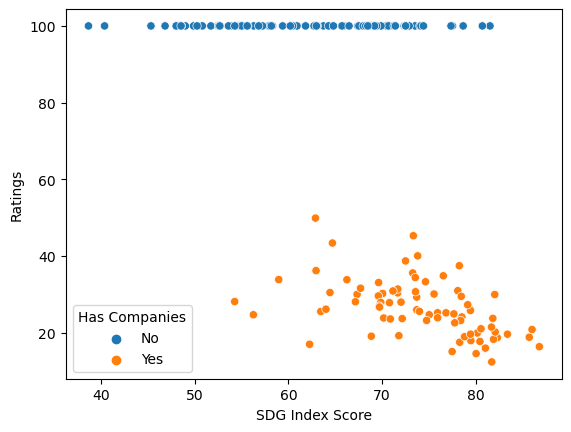

In [131]:
sns.scatterplot(data=company_summary, y='Ratings', x='SDG Index Score', hue='Has Companies');

/Users/paloma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


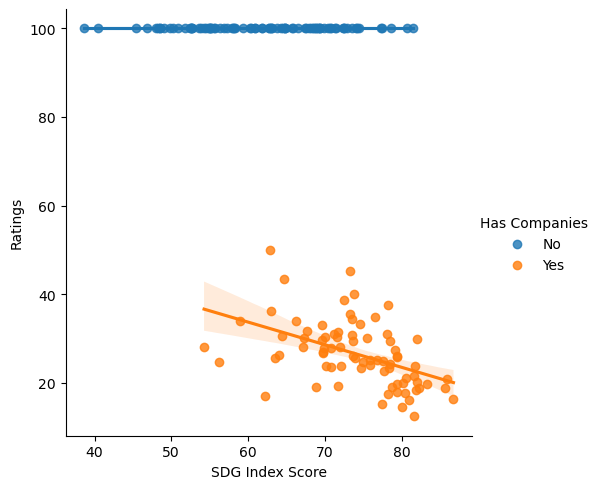

In [132]:
sns.lmplot(data=company_summary, y='Ratings', x='SDG Index Score', hue='Has Companies');

In [133]:
#check correlation between ESG scores and each goal's score per country

In [134]:
goals_score.rename(columns = {'Country Code ISO3': 'ISO (3)'}, inplace = True)

In [135]:
eda_esg_goals = pd.merge(goals_score,company_summary, on = ['ISO (3)', 'Country'], how= 'left')
eda_esg_goals = eda_esg_goals[eda_esg_goals['year'] == 2022]

In [136]:
eda_esg_goals.head(1)

,ISO (3),Country,year,population,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,Goal 6 Score,...,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score,SDG Index Score,Companies,Ratings,Risk,Has Companies
22,AFG,Afghanistan,2022,40580490.0,12.4105,46.915143,37.486714,34.366,32.92625,50.426,...,99.034333,NaN,73.2382,44.796182,45.289,49.005601,0.0,100.0,NA,No


In [137]:
eda_esg_goals.columns

Index(['ISO (3)', 'Country', 'year', 'population', 'Goal 1 Score',
       'Goal 2 Score', 'Goal 3 Score', 'Goal 4 Score', 'Goal 5 Score',
       'Goal 6 Score', 'Goal 7 Score', 'Goal 8 Score', 'Goal 9 Score',
       'Goal 10 Score', 'Goal 11 Score', 'Goal 12 Score', 'Goal 13 Score',
       'Goal 14 Score', 'Goal 15 Score', 'Goal 16 Score', 'Goal 17 Score',
       'SDG Index Score', 'Companies', 'Ratings', 'Risk', 'Has Companies'],
      dtype='object')

<Figure size 3000x3000 with 0 Axes>

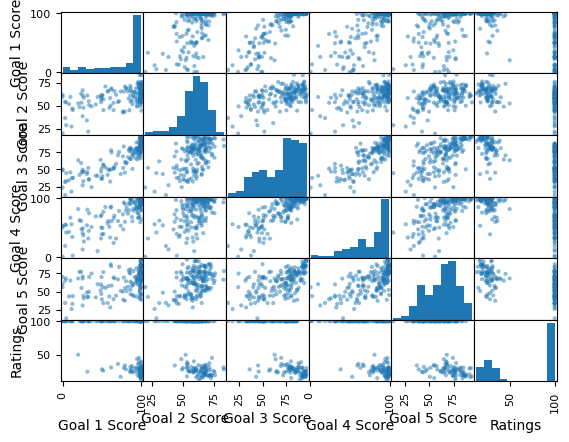

In [138]:
plt.figure(figsize=(30, 30))

pd.plotting.scatter_matrix(eda_esg_goals[['Goal 1 Score',
       'Goal 2 Score', 'Goal 3 Score', 'Goal 4 Score', 'Goal 5 Score', 'Ratings']]);

<Figure size 1800x1500 with 0 Axes>

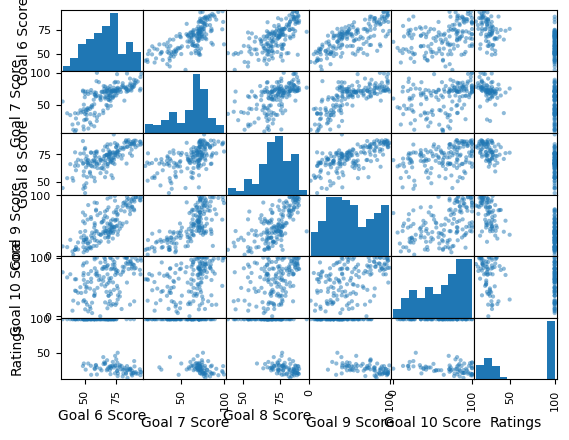

In [139]:
plt.figure(figsize=(18, 15))

pd.plotting.scatter_matrix(eda_esg_goals[['Goal 6 Score', 'Goal 7 Score', 'Goal 8 Score', 'Goal 9 Score',
       'Goal 10 Score', 'Ratings']]);

<Figure size 1800x1500 with 0 Axes>

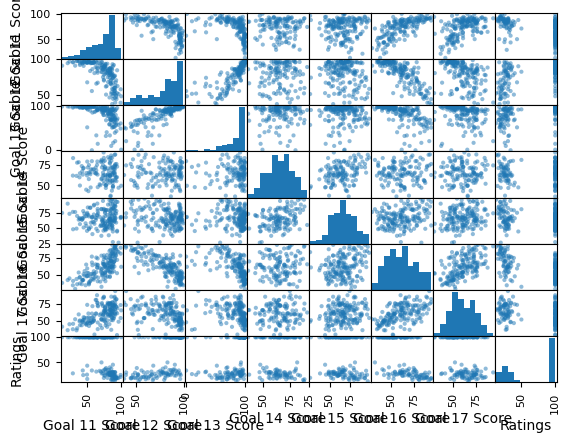

In [140]:
plt.figure(figsize=(18, 15))

pd.plotting.scatter_matrix(eda_esg_goals[['Goal 11 Score', 'Goal 12 Score', 'Goal 13 Score',
       'Goal 14 Score', 'Goal 15 Score', 'Goal 16 Score', 'Goal 17 Score', 'Ratings']]);

In [141]:
eda_esg_goals_corr = eda_esg_goals.drop(columns = ['ISO (3)', 'Country', 'year', 'population', 'Has Companies', 'Risk', 'Companies'])

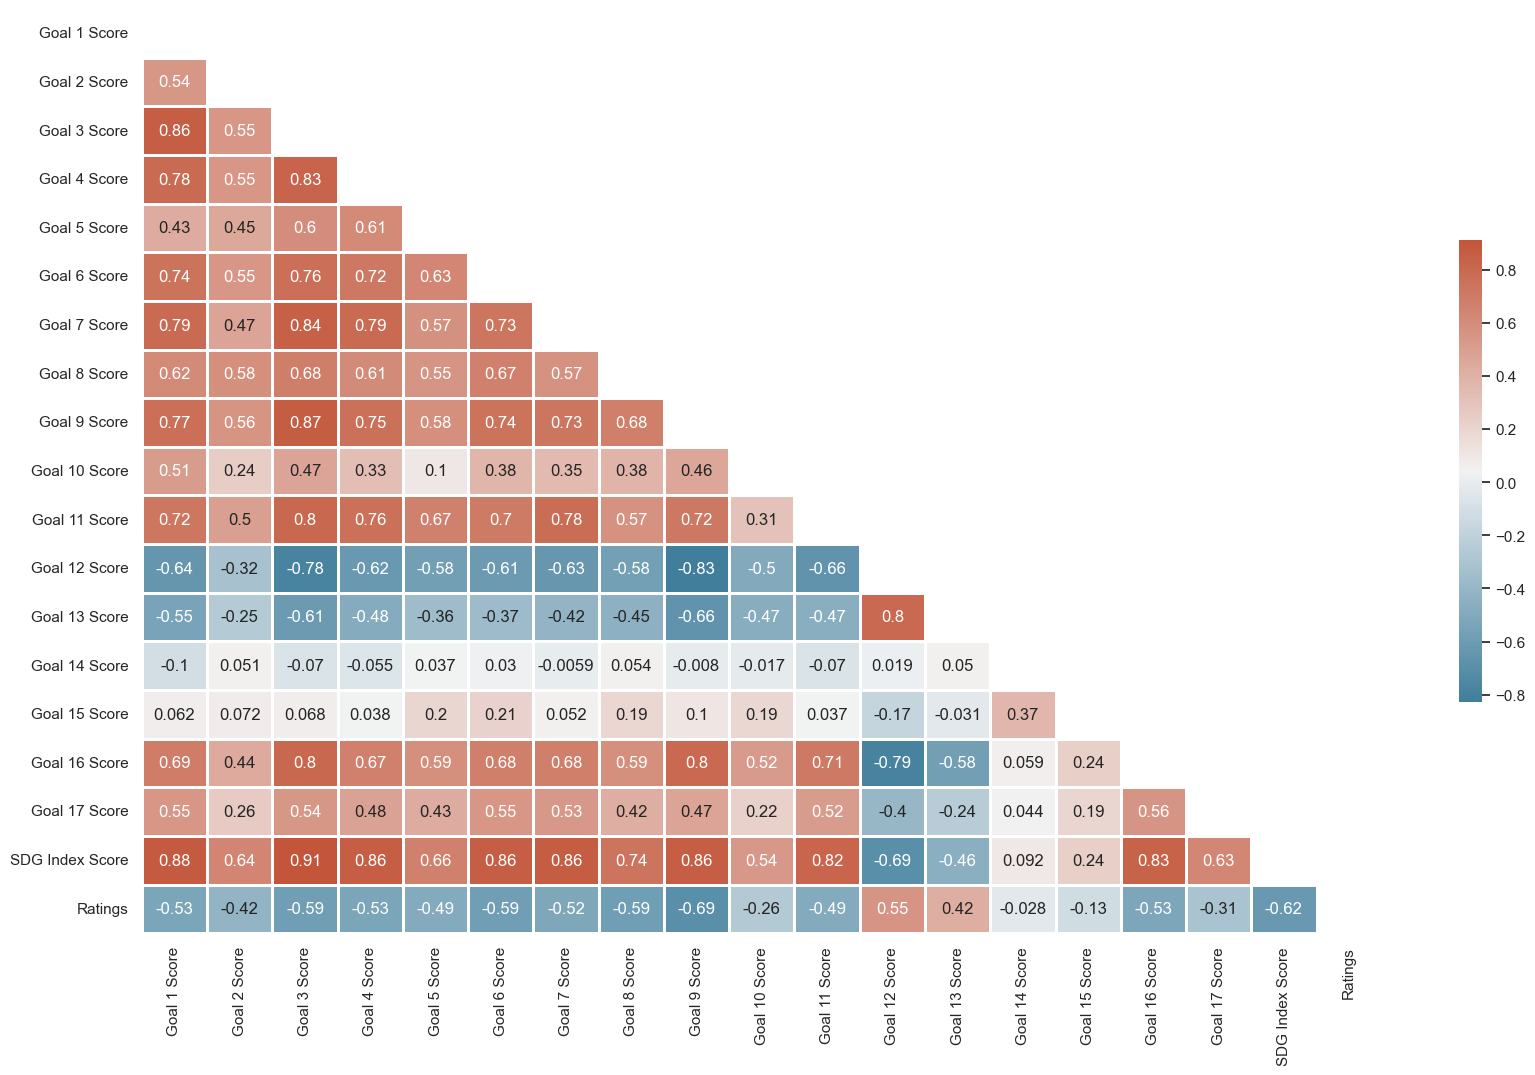

In [142]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = eda_esg_goals_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            annot=True,
            linewidths=.8, 
            cbar_kws={"shrink": .5}
           );

Goals with more correlation:

Positive:
- Goal 9: Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation
- Goal 3: Ensure healthy lives and promote well-being for all at all ages
- Goal 6: Ensure availability and sustainable management of water and sanitation for all
- Goal 8: Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all

Negative:
- Goal 12: Ensure sustainable consumption and production patterns (

In [143]:
companies_industry_eda = []

In [144]:
companies_industry_eda = pd.merge(companies_tableau,eda_esg_goals.drop(columns = ['Companies', 'Ratings', 'Risk', 'Has Companies']), on=['ISO (3)', 'Country'], how = 'left')

In [145]:
corr_df = companies_industry_eda.drop(columns = ['ISO (3)', 'Companies', 'Symbols', 'Risk', 'Continent', 'year', 'Region', 'Country', 'population'])

In [146]:
corr_df['Industry'] = corr_df['Industry'].str.capitalize()

In [147]:
indsutries_list = (corr_df['Industry'].drop_duplicates()).to_list()

In [148]:
industry_replacements = dict(zip(indsutries_list,list(range(1,len(indsutries_list)+1))))

In [149]:
corr_df = corr_df.replace(industry_replacements)

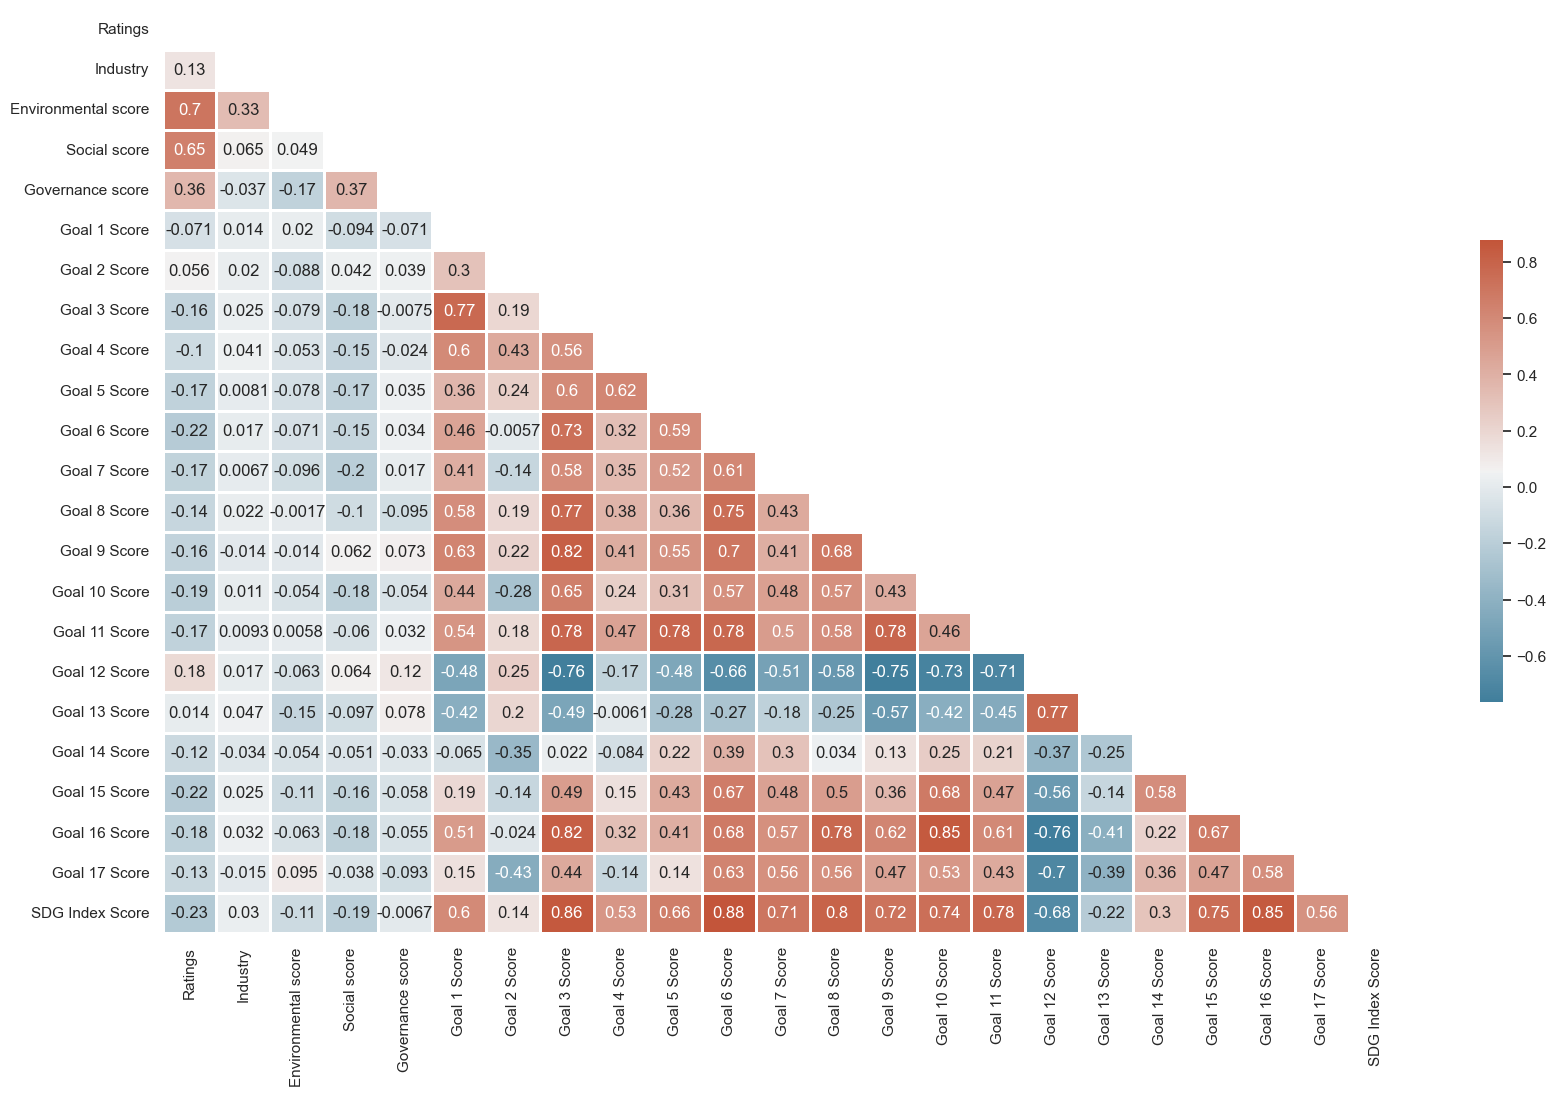

In [150]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            annot=True,
            linewidths=.8, 
            cbar_kws={"shrink": .5}
           );

In [151]:
#With the amount of data available, we cannot see any correlation between industry and ESG rating